In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("Seasons_Stats.csv")
df.head()


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


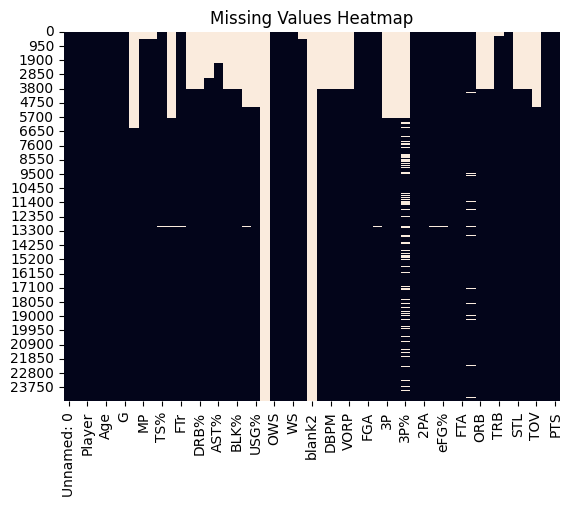

In [4]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
# Keep only rows where 'PTS' (points) is not null
df = df[df['PTS'].notna()]

# Drop columns with too many nulls (optional)
df = df.dropna(thresh=len(df)*0.5, axis=1)

# Fill remaining nulls with 0
df.fillna(0, inplace=True)


In [7]:
df = df[df['Year'] >= 1980]


In [8]:
# Select numeric features only
numeric_df = df.select_dtypes(include=[np.number])

# Drop target column from features
features = numeric_df.drop(columns=['PTS'])

# Target variable
target = numeric_df['PTS']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test_scaled)


In [13]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.5219876281585033e-24
R2 Score: 1.0


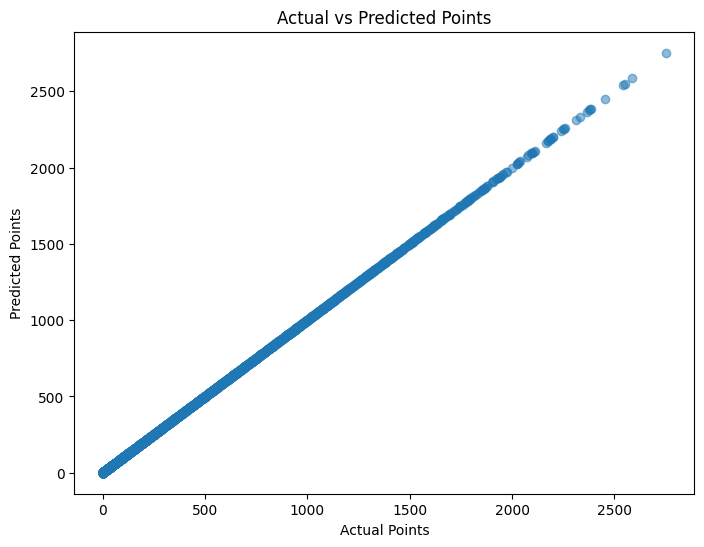

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual vs Predicted Points")
plt.show()


In [15]:
df.to_csv("cleaned_season_stats.csv", index=False)


In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [17]:
# Remove 'PTS' from features
features = numeric_df.drop(columns=['PTS'])

# Target
target = numeric_df['PTS']


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


In [19]:
print("Random Forest - MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest - R2 Score:", r2_score(y_test, rf_pred))


Random Forest - MSE: 180.3831218700476
Random Forest - R2 Score: 0.9992210626117284


In [20]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

print("Ridge - MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge - R2 Score:", r2_score(y_test, ridge_pred))


Ridge - MSE: 0.08230644797921852
Ridge - R2 Score: 0.9999996445811062


In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_scaled, y_train)
tree_pred = tree_model.predict(X_test_scaled)

print("Decision Tree - MSE:", mean_squared_error(y_test, tree_pred))
print("Decision Tree - R2 Score:", r2_score(y_test, tree_pred))


Decision Tree - MSE: 589.7815636555731
Decision Tree - R2 Score: 0.9974531823926653


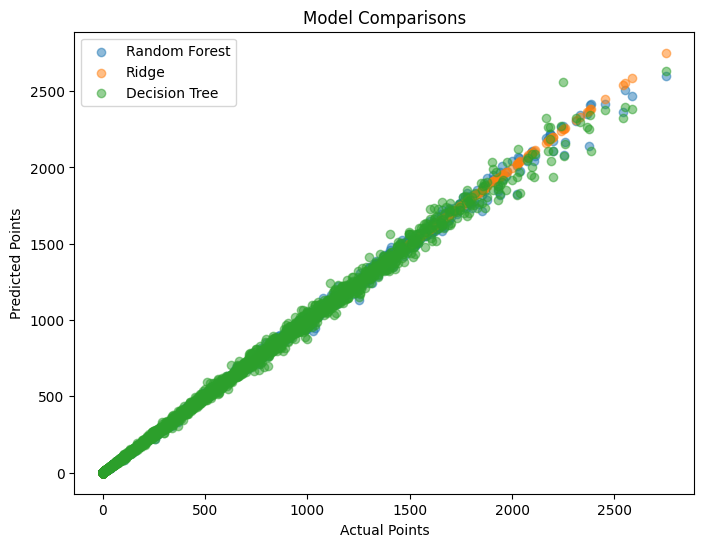

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred, alpha=0.5, label="Random Forest")
plt.scatter(y_test, ridge_pred, alpha=0.5, label="Ridge")
plt.scatter(y_test, tree_pred, alpha=0.5, label="Decision Tree")
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.legend()
plt.title("Model Comparisons")
plt.show()


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Seasons_Stats.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


<Figure size 1000x600 with 0 Axes>

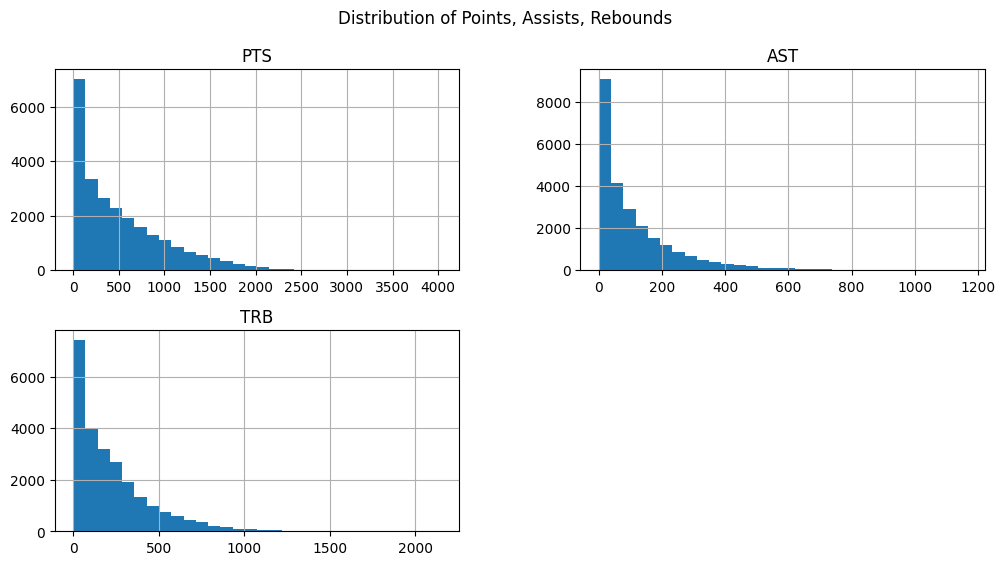

ValueError: could not convert string to float: 'Curly Armstrong'

<Figure size 1400x1000 with 0 Axes>

In [25]:
# Distributions
plt.figure(figsize=(10,6))
df[['PTS', 'AST', 'TRB']].hist(bins=30, figsize=(12,6))
plt.suptitle("Distribution of Points, Assists, Rebounds")
plt.show()

# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


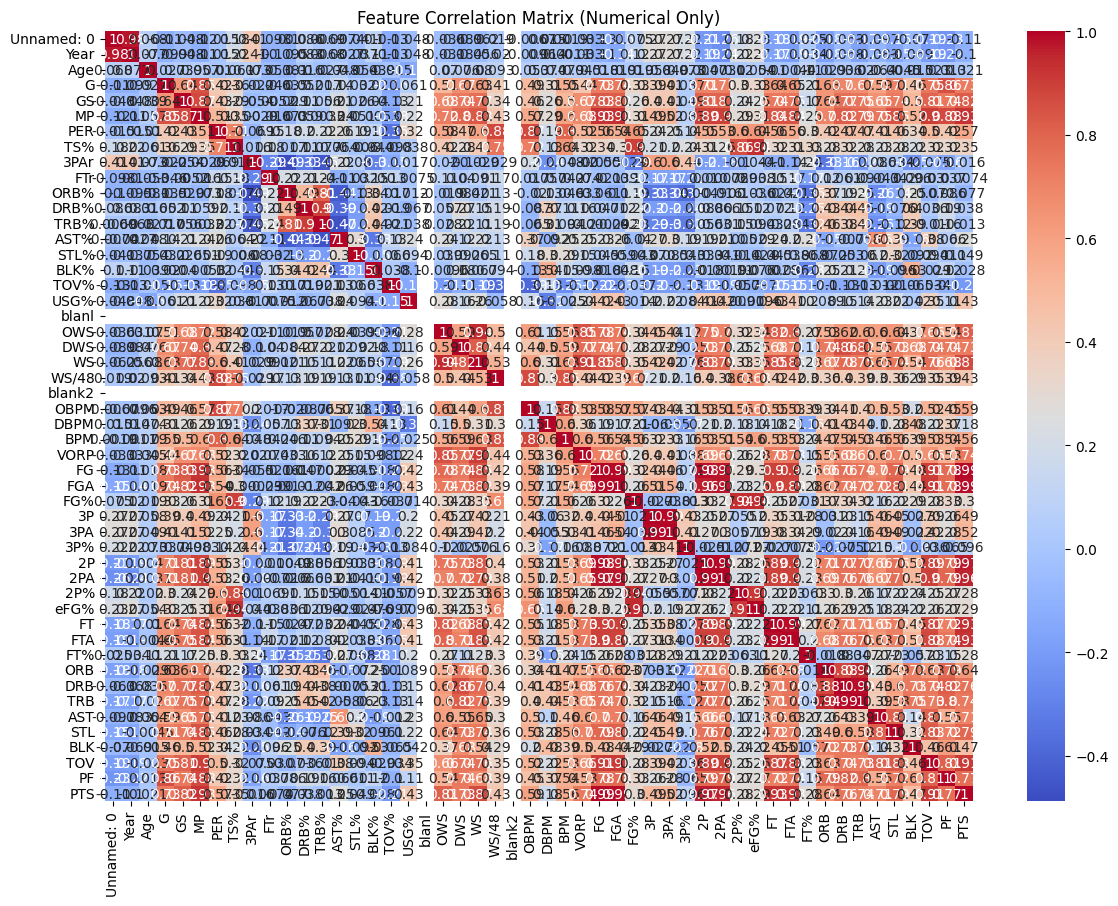

In [28]:
# Use only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix (Numerical Only)")
plt.show()


In [30]:
df = df[df['G'] > 0].copy()  # Filter out players with zero games

# Create per-game stats
df['PTS_per_G'] = df['PTS'] / df['G']
df['AST_per_G'] = df['AST'] / df['G']
df['TRB_per_G'] = df['TRB'] / df['G']


PER           1.000000
WS/48         0.864890
OBPM          0.756285
TS%           0.704535
BPM           0.687917
FG%           0.648740
eFG%          0.647370
PTS_per_G     0.616571
2P%           0.606627
WS            0.572443
PTS           0.561121
FG            0.554632
OWS           0.552964
2P            0.539088
FT            0.532241
FTA           0.530889
MP            0.530250
FGA           0.525056
2PA           0.506682
TRB_per_G     0.478513
VORP          0.472783
TRB           0.469268
DWS           0.449895
DRB           0.427860
TOV           0.423524
STL           0.413773
G             0.406815
PF            0.401107
AST           0.400964
ORB           0.383310
AST_per_G     0.381875
FT%           0.373798
GS            0.360589
BLK           0.313893
AST%          0.279461
TRB%          0.222207
3PA           0.220460
3P            0.216140
USG%          0.204672
DRB%          0.192846
STL%          0.191746
ORB%          0.182959
3P%           0.171387
DBPM       

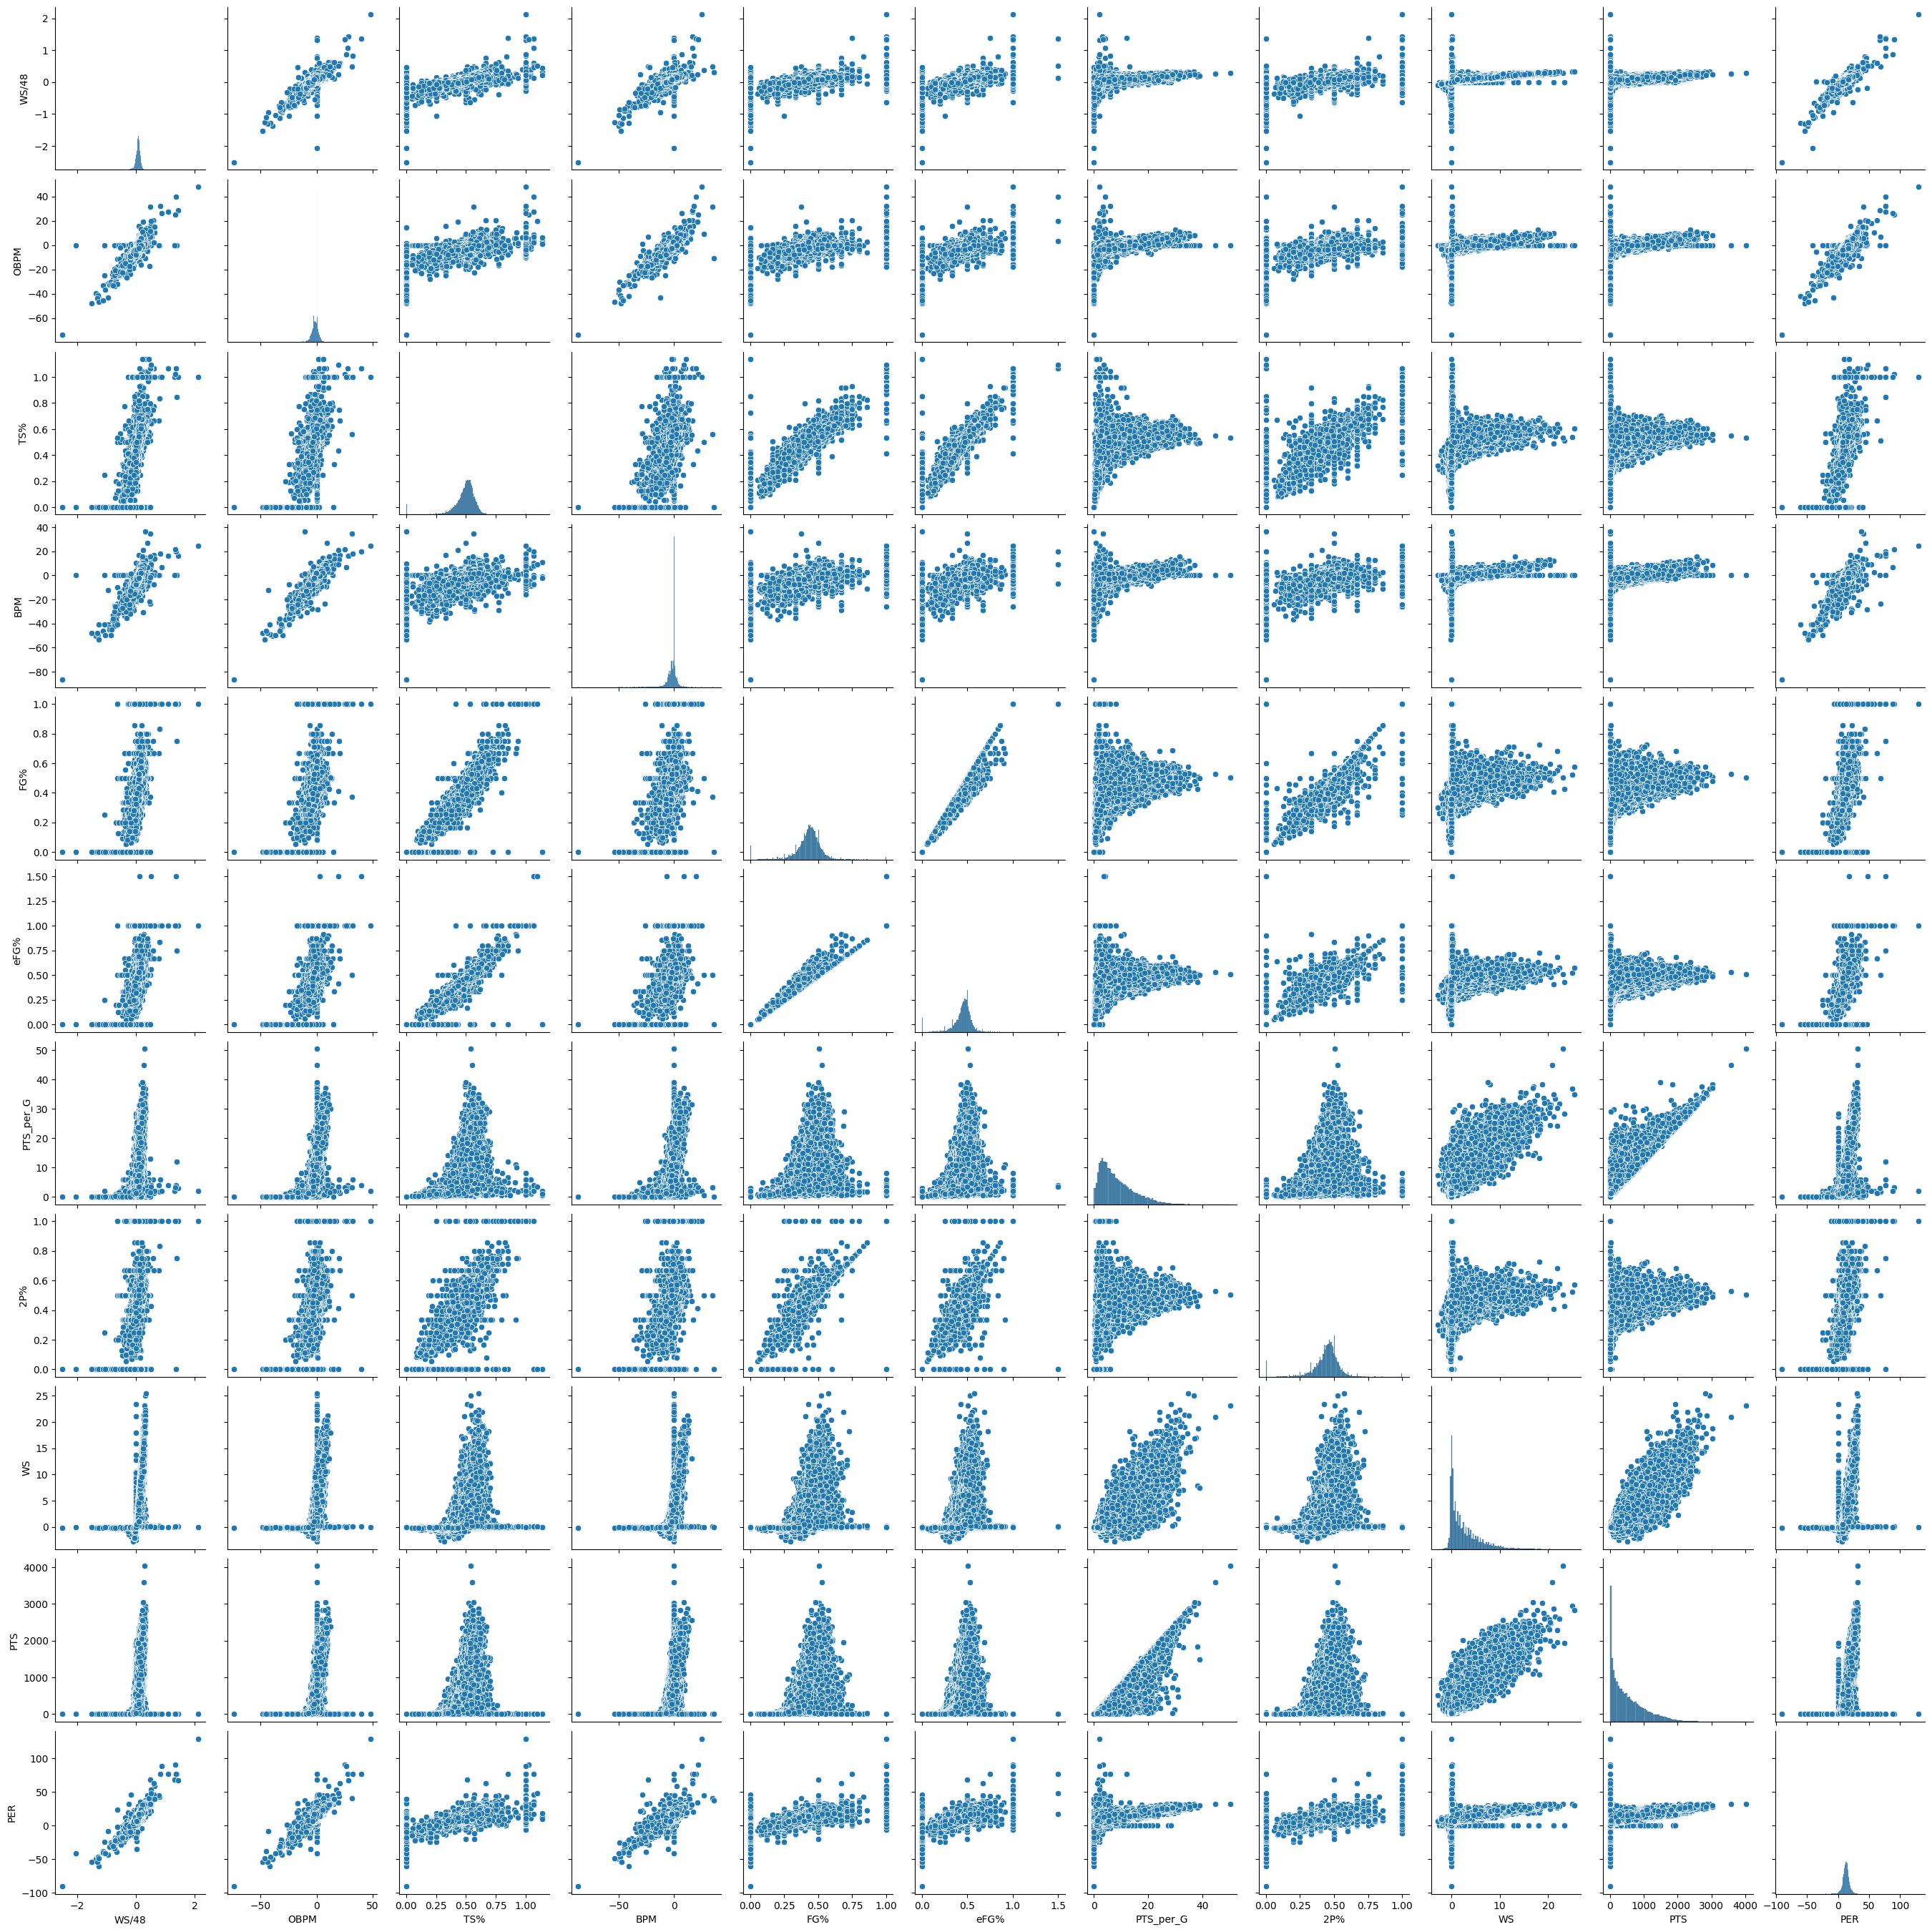

In [31]:
# Select numerical features
numeric_df = df.select_dtypes(include='number')

# Target: Predicting PER (Player Efficiency Rating)
target = 'PER'
features = numeric_df.drop(columns=[target])

# Correlation with target
correlations = numeric_df.corr()[target].sort_values(ascending=False)
print(correlations)

# Optional: Visualize top features
top_corr_features = correlations[1:11].index.tolist()
sns.pairplot(df[top_corr_features + [target]])


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[top_corr_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

print("Linear Regression R²:", r2_score(y_test, lr_pred))
print("Linear Regression MAE:", mean_absolute_error(y_test, lr_pred))


Linear Regression R²: 0.8422924606042526
Linear Regression MAE: 1.657735267052227


In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

print("Ridge Regression R²:", r2_score(y_test, ridge_pred))
print("Ridge Regression MAE:", mean_absolute_error(y_test, ridge_pred))


Ridge Regression R²: 0.8422964488736975
Ridge Regression MAE: 1.6577356565709602


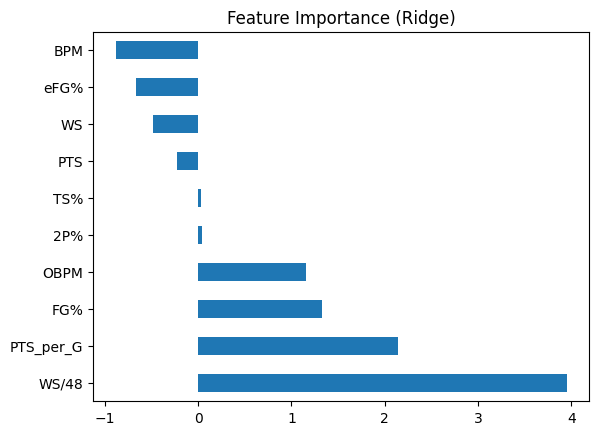

In [35]:
# Feature coefficients from Ridge
feature_importance = pd.Series(ridge.coef_, index=top_corr_features)
feature_importance.sort_values(ascending=False).plot(kind='barh', title='Feature Importance (Ridge)')
plt.show()
